In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("synthetic_loss_data.csv")

In [3]:
df.head()

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure,Age_of_Loss
0,African,Highly Religious,College,Low,Non-binary,Rural,High,No,Authoritarian,High,21.0
1,Middle Eastern,NaN,High School,High,Male,Rural,High,Yes,Permissive,Medium,21.0
2,Western,NaN,High School,Low,Non-binary,Urban,High,Yes,Authoritarian,High,14.0
3,African,Highly Religious,College,Middle,Female,Urban,Moderate,Yes,Authoritarian,Medium,20.0
4,African,NaN,College,Middle,Non-binary,Rural,Low,No,Permissive,Low,20.0


In [4]:
column_maps = {}
for column_name in df.columns:
    if column_name == 'Age_of_Loss':
        continue
    uniq = df[column_name].unique()
    column_maps[column_name] = {uniq[ind]: ind+1 for ind, val in enumerate(uniq)}
    

In [5]:
column_maps

{'Cultural_Background': {'African': 1,
  'Middle Eastern': 2,
  'Western': 3,
  'Asian': 4},
 'Religious_Affiliation': {'Highly Religious': 1, nan: 2, 'Moderate': 3},
 'Level_of_Education': {'College': 1, 'High School': 2, 'Advanced Degree': 3},
 'Family_Income_Level': {'Low': 1, 'High': 2, 'Middle': 3},
 'Gender': {'Non-binary': 1, 'Male': 2, 'Female': 3},
 'Urban_or_Rural': {'Rural': 1, 'Urban': 2},
 'Peer_Group_Influence': {'High': 1, 'Moderate': 2, 'Low': 3},
 'Education': {'No': 1, 'Yes': 2},
 'Parenting_Style': {'Authoritarian': 1, 'Permissive': 2, 'Neglectful': 3},
 'Tech_Media_Exposure': {'High': 1, 'Medium': 2, 'Low': 3}}

In [6]:
for column in df:
    if column == 'Age_of_Loss':
        continue
    df[column] = df[column].map(column_maps[column])

In [7]:
df

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure,Age_of_Loss
0,1,1,1,1,1,1,1,1,1,1,21.0
1,2,2,2,2,2,1,1,2,2,2,21.0
2,3,2,2,1,1,2,1,2,1,1,14.0
3,1,1,1,3,3,2,2,2,1,2,20.0
4,1,2,1,3,1,1,3,1,2,3,20.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,2,3,2,2,2,1,2,3,2,17.0
496,1,2,2,1,3,1,2,1,3,1,20.0
497,2,2,3,3,2,2,2,2,1,2,15.0
498,3,3,2,1,1,2,3,2,2,1,20.0


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, 'Cultural_Background':'Tech_Media_Exposure'], df['Age_of_Loss'], test_size=0.2)

In [9]:
X_train

,Cultural_Background,Religious_Affiliation,Level_of_Education,Family_Income_Level,Gender,Urban_or_Rural,Peer_Group_Influence,Education,Parenting_Style,Tech_Media_Exposure
68,2,1,3,3,3,2,3,2,1,3
214,1,2,2,3,1,2,2,2,2,2
35,3,3,1,3,1,2,3,2,1,2
29,2,1,3,3,3,2,2,1,1,2
376,2,2,1,3,3,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...
436,2,2,2,1,1,1,2,1,3,1
56,2,1,1,1,2,1,2,2,1,3
99,3,2,2,2,3,1,3,1,2,3
277,4,3,2,1,1,1,3,2,1,2


In [10]:
Y_train

68     17.0
214    19.0
35     19.0
29     18.0
376    20.0
       ... 
436    17.0
56     20.0
99     18.0
277    17.0
186    15.0
Name: Age_of_Loss, Length: 400, dtype: float64

In [11]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [12]:
prediction = lr.predict(X_test)

In [13]:
prediction

array([17.63458076, 18.41770243, 18.00091541, 17.83590976, 17.95963013,
       17.90621351, 18.7734951 , 18.41644142, 17.65621003, 17.90446068,
       17.99032121, 18.36495163, 18.07545522, 18.3034647 , 18.29211518,
       17.96853026, 18.08081868, 17.28943273, 18.42325074, 18.0176621 ,
       18.40246411, 18.41294259, 17.31562422, 17.57095979, 18.50946099,
       17.60431077, 17.89321986, 18.08305682, 18.13586489, 18.48530986,
       18.16997018, 19.04186761, 18.37783124, 18.38418177, 18.24639127,
       18.33322401, 17.61517068, 18.22845427, 18.80395173, 18.15455814,
       18.03983127, 18.16121677, 18.59135401, 17.65097906, 18.63326274,
       17.77447477, 17.43229825, 18.3579808 , 18.4999433 , 17.89445086,
       18.37644956, 17.87422899, 18.93875953, 18.58829726, 18.70047194,
       17.83998042, 18.07029691, 17.89619639, 17.38810269, 17.8792055 ,
       17.90067738, 17.62090079, 18.32253886, 18.30431872, 18.99327056,
       18.35870735, 17.67758886, 18.81650348, 17.92590305, 18.58

In [14]:
prediction.shape

(100,)

In [15]:
Y_test

37     16.0
337    21.0
238    20.0
135    14.0
164    19.0
       ... 
96     15.0
365    17.0
294    20.0
184    17.0
197    23.0
Name: Age_of_Loss, Length: 100, dtype: float64

In [16]:
import numpy as np
absolute_deviation = np.abs(prediction - Y_test)
mean_absolute_error = np.mean(absolute_deviation)

percentage_deviation = (absolute_deviation / Y_test) * 100
mean_absolute_percentage_error = np.mean(percentage_deviation)

In [17]:
mean_absolute_percentage_error

np.float64(12.394964626614575)

In [18]:
column_maps

{'Cultural_Background': {'African': 1,
  'Middle Eastern': 2,
  'Western': 3,
  'Asian': 4},
 'Religious_Affiliation': {'Highly Religious': 1, nan: 2, 'Moderate': 3},
 'Level_of_Education': {'College': 1, 'High School': 2, 'Advanced Degree': 3},
 'Family_Income_Level': {'Low': 1, 'High': 2, 'Middle': 3},
 'Gender': {'Non-binary': 1, 'Male': 2, 'Female': 3},
 'Urban_or_Rural': {'Rural': 1, 'Urban': 2},
 'Peer_Group_Influence': {'High': 1, 'Moderate': 2, 'Low': 3},
 'Education': {'No': 1, 'Yes': 2},
 'Parenting_Style': {'Authoritarian': 1, 'Permissive': 2, 'Neglectful': 3},
 'Tech_Media_Exposure': {'High': 1, 'Medium': 2, 'Low': 3}}

In [19]:
ip = []
for col, mapping in column_maps.items():
    print(col)
    for val, ind in mapping.items():
        print(f"{ind}: {val}")
    ip.append(int(input("Enter choice: ")))

print(f"Predicted age is {lr.predict(np.array([ip]))[0]}")

Cultural_Background
1: African
2: Middle Eastern
3: Western
4: Asian


ValueError: invalid literal for int() with base 10: ''

In [20]:
from sklearn.metrics import r2_score
r2_score(Y_test, prediction)

-0.07487094168613062

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge_regressor=Ridge()

In [24]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)

/usr/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [25]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=parameters,
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [26]:
ridgecv.best_params_

{'alpha': 90}

In [27]:
ridge_pred=ridgecv.predict(X_test)

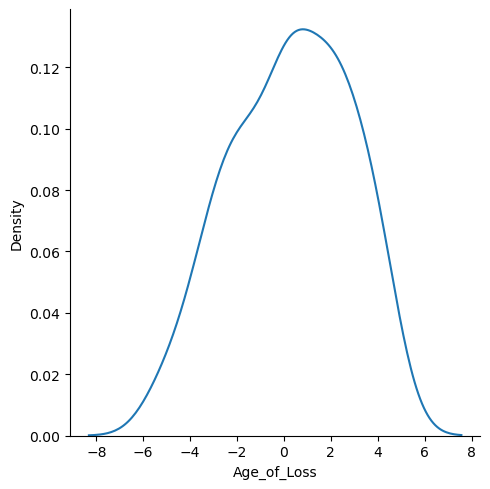

In [29]:
import seaborn as sns
sns.displot(ridge_pred-Y_test,kind='kde')

In [30]:
score=r2_score(ridge_pred,Y_test)

In [31]:
score

-87.9316978069856

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso()

In [34]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,Y_train)

/usr/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [35]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-5.450410156250001


In [36]:
lasso_pred=lassocv.predict(X_test)

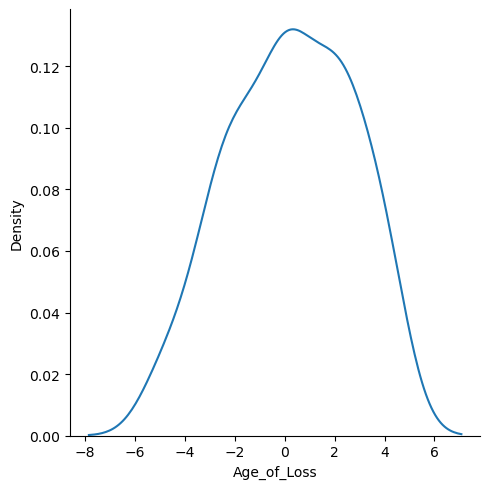

In [38]:
import seaborn as sns
sns.displot(lasso_pred-Y_test,kind='kde')

In [40]:
r2_score(lasso_pred,Y_test)

-4.861123139225204e+29